In [1]:
# Explorary Data Analysis 

import pandas as pd
import numpy as np

# Load the data

data = pd.read_csv('creditcard.csv')
data.head()



# change the column class to boolean

data['Class'] = data['Class'].astype(bool)



In [2]:
'''
The data is already clean and does not contain any missing values.'''

# The data contains 10 columns and 1000 rows. The columns are:

data.columns

data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

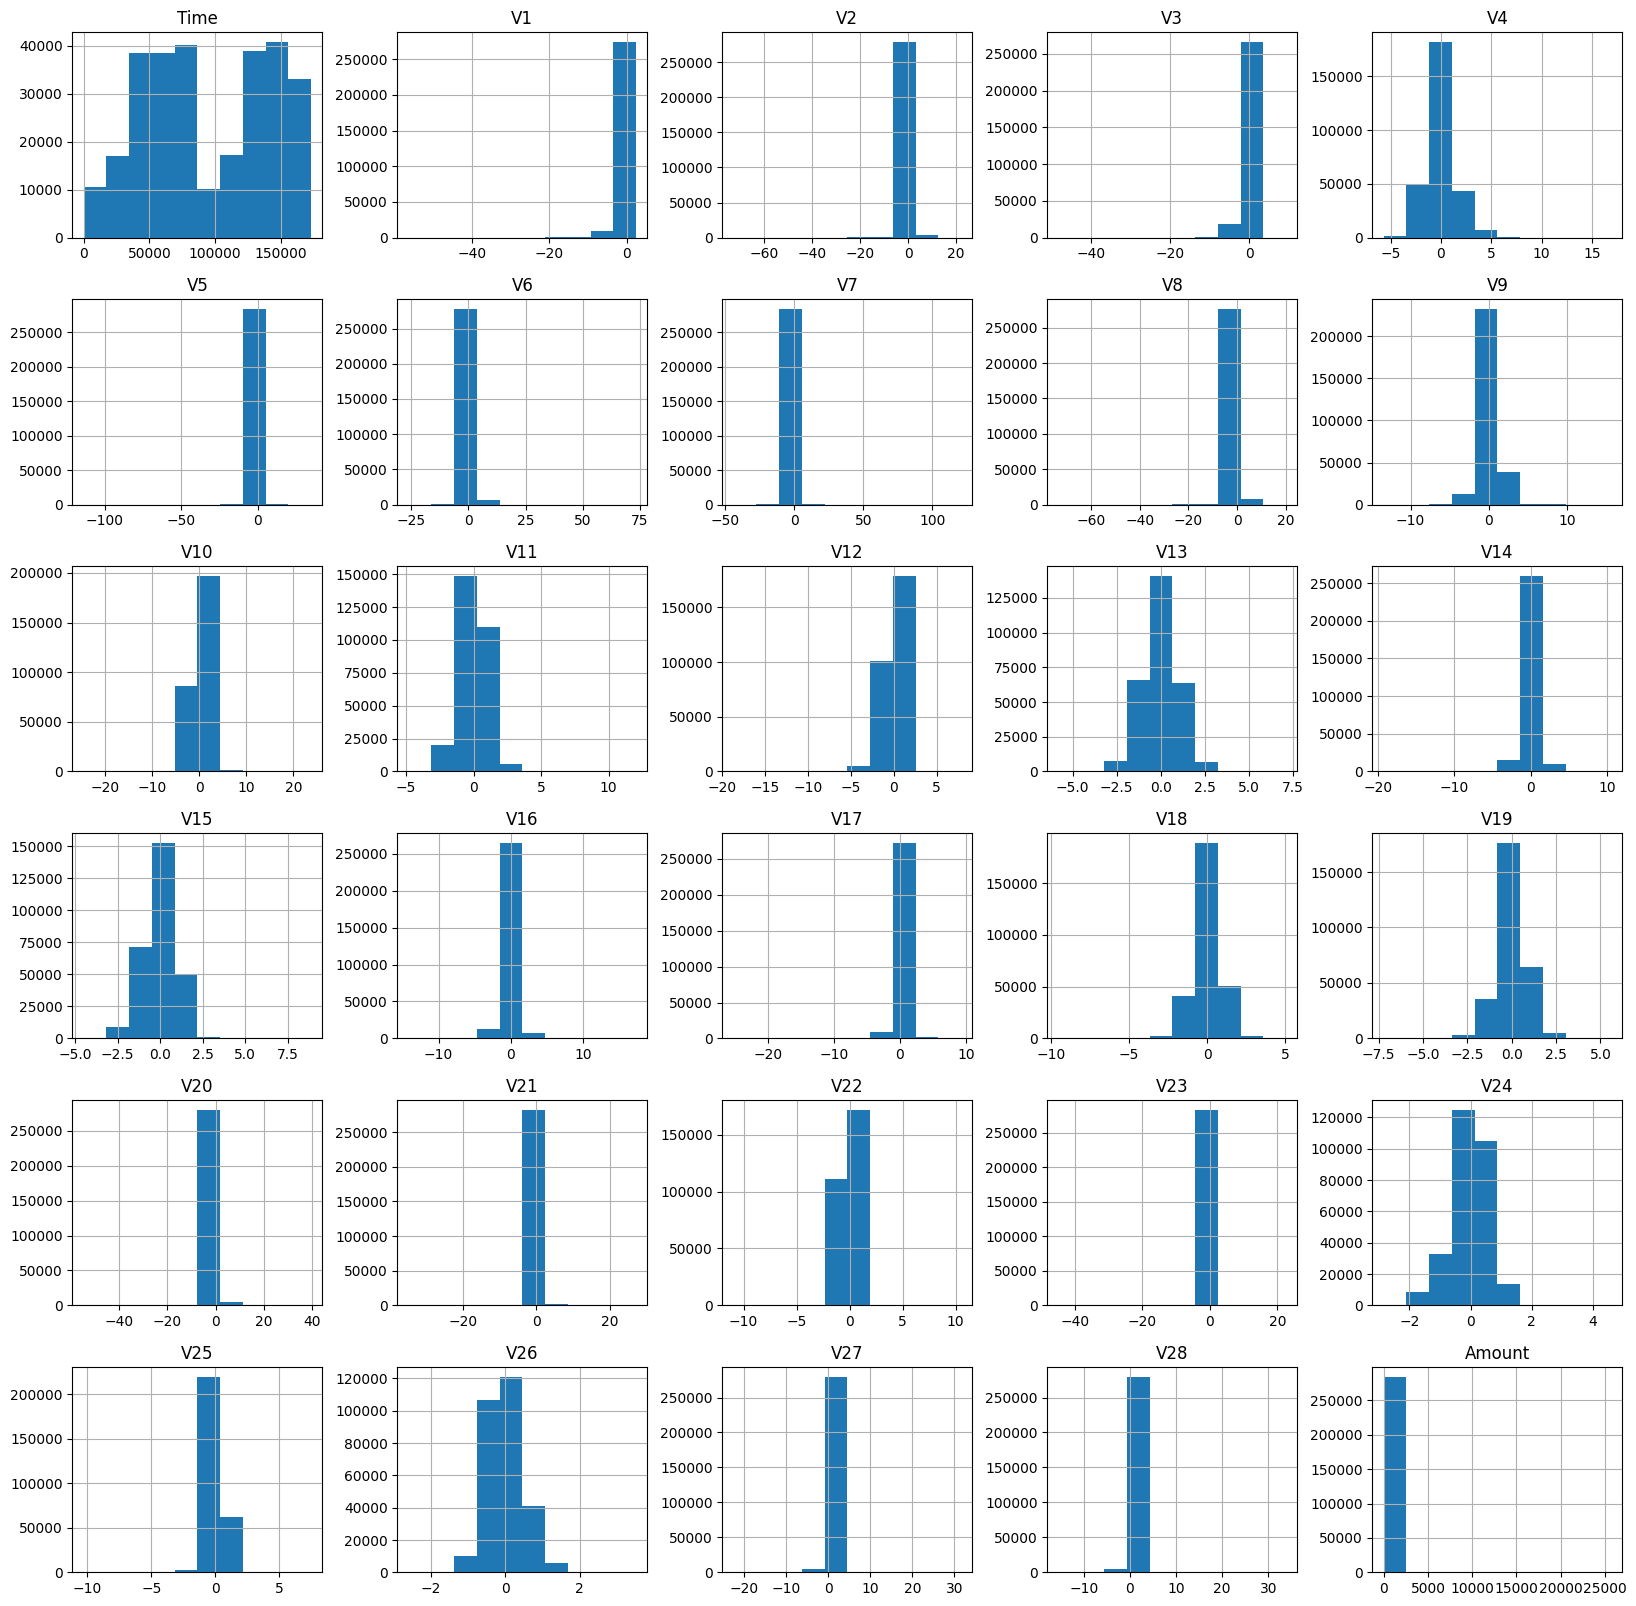

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

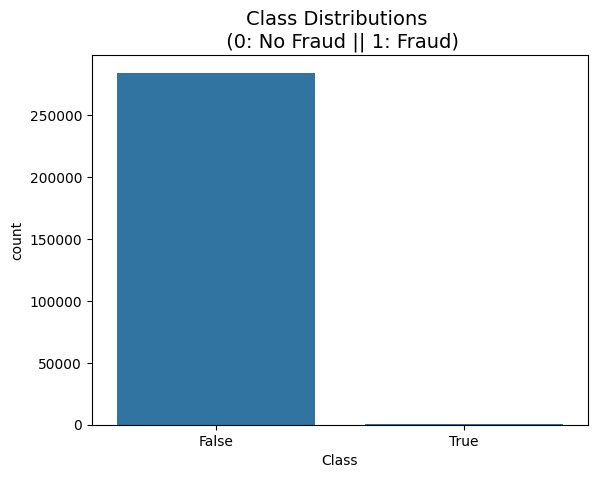

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# The distribution of all the features

data.hist(figsize=(20,20))
plt.show()




# The distribution of the target variable

sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)



In [4]:
# The distribution of the fraudulent and non-fraudulent transactions

fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print('Fraud Cases: {}'.format(len(fraud)))
print('Non-Fraud Cases: {}'.format(len(non_fraud)))

outlier_fraction = len(fraud) / float(len(non_fraud))
print('Outlier Fraction: {}'.format(outlier_fraction))

Fraud Cases: 492
Non-Fraud Cases: 284315
Outlier Fraction: 0.0017304750013189597


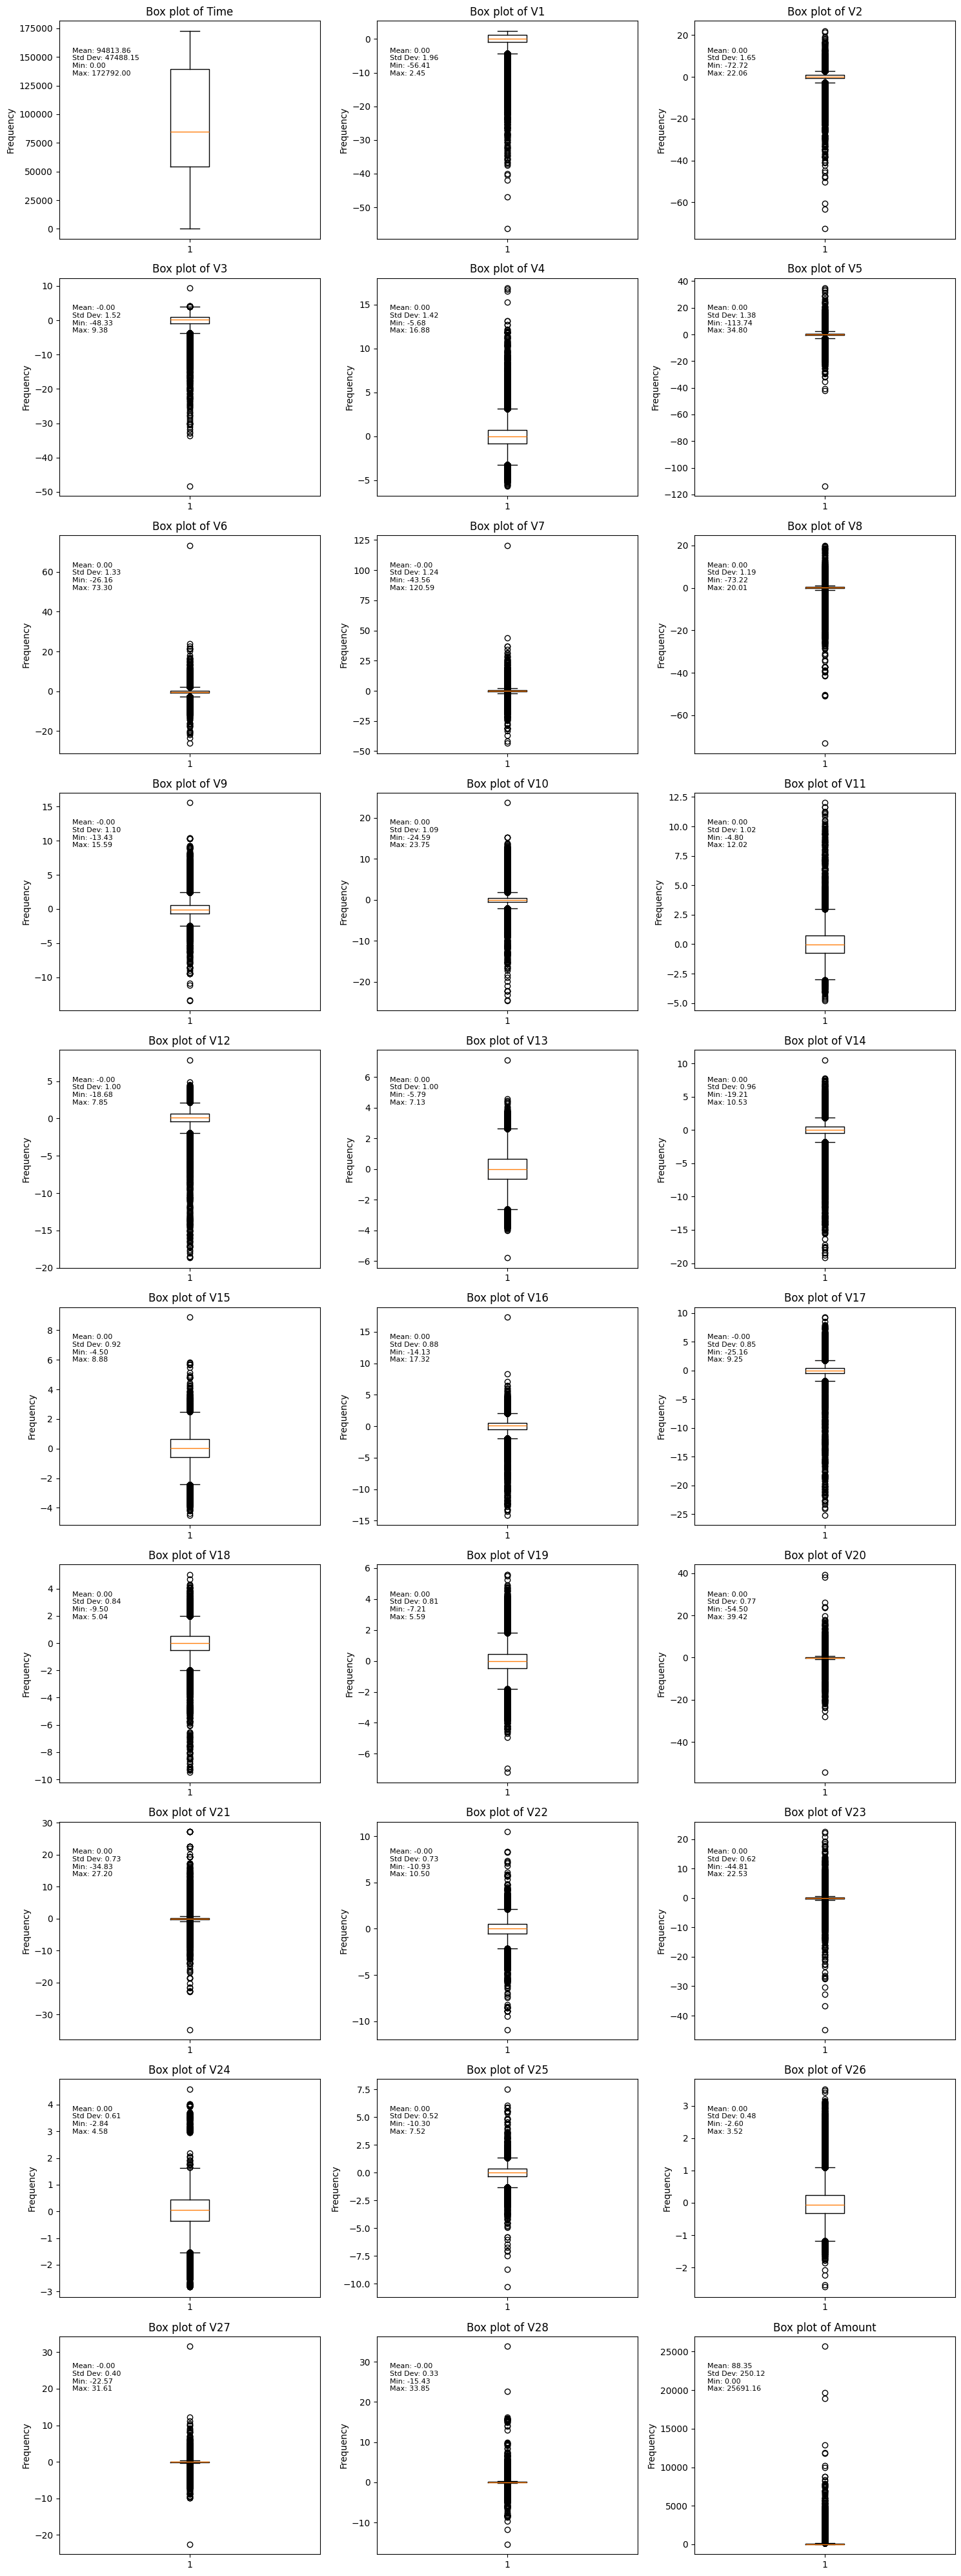

In [5]:
num_rows = (len(data.columns) // 3)
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))
axes = axes.flatten()
summary_stats = data.describe()

for i, col in enumerate(data.columns[ : -1]):
    axes[i].boxplot(data[col].dropna()) 
    axes[i].set_title('Box plot of ' + col)
    
    axes[i].set_ylabel('Frequency')
    stats_text = f"Mean: {summary_stats.loc['mean', col]:.2f}\nStd Dev: {summary_stats.loc['std', col]:.2f}\nMin: {summary_stats.loc['min', col]:.2f}\nMax: {summary_stats.loc['max', col]:.2f}"
    axes[i].annotate(stats_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=8, color='black')

plt.tight_layout()
plt.show()

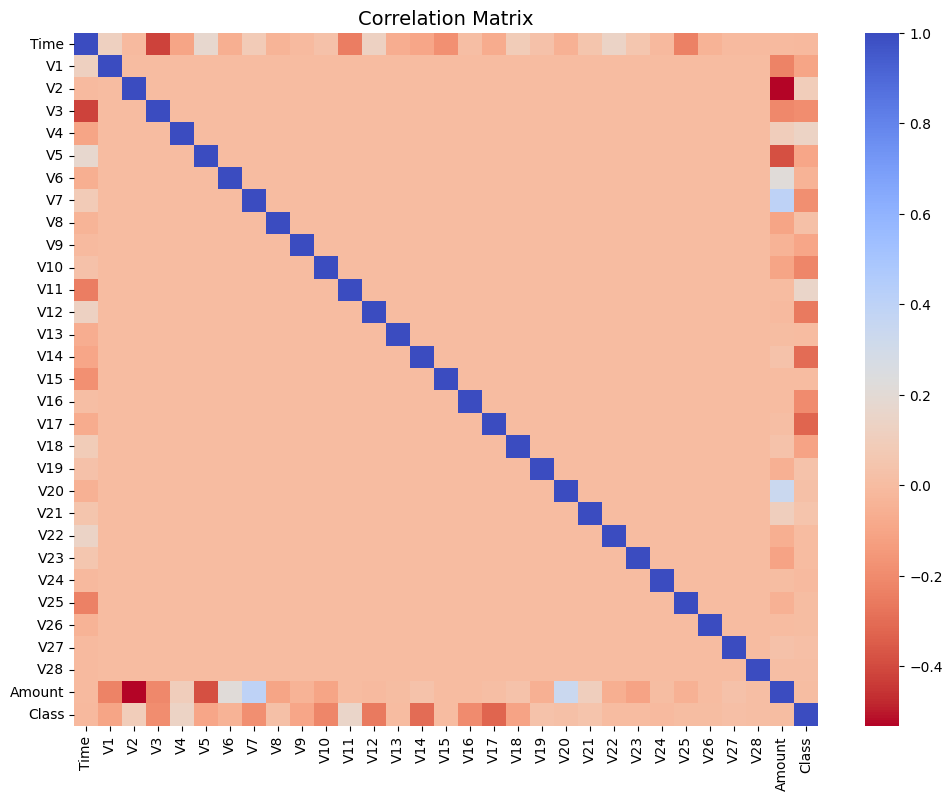

In [6]:
# The correlation matrix

correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix', fontsize=14)
plt.show()
